# A Fresh Look at Gaits

When we looksed at gaits earlier our focus was on getting the robot to move. We developed a foot trajectory that we applied to all 4 legs with a phase shift to opposite side fron and hind legs.

We now look at different ways we can move the legs. There are different names used in literature and we look at gais that we call walk, trot and gallop.


## Reference

The following sources helped me to refine my understanding

<a href="https://www.researchgate.net/publication/315476713_A_Quadruped_Robot_Exhibiting_Spontaneous_Gait_Transitions_from_Walking_to_Trotting_to_Galloping" target="_blank">A Quadruped Robot Exhibiting Spontaneous Gait Transitions from Walking to Trotting to Galloping</a>

<a href="https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjXpsOr__X4AhVLnRoKHQ5JBIAQFnoECAYQAQ&url=https%3A%2F%2Farxiv.org%2Fabs%2F2205.06526&usg=AOvVaw3R6sDBp4quwwFHmGNN1iXD" target="_blank">WoLF: the Whole-body Locomotion Framework for Quadruped Robots</a>

<a href="https://github.com/chvmp/champ" target="_blank">champ</a>


## Foot Trajectory planning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
from gaits3D import GaitController3D
gc = GaitController3D()

In [3]:
trajectory = np.zeros((gc.number_of_points * 2 - 2, 3))

In [4]:
trajectory[:, 0] = gc._stance_phase(100, False) + list(gc._swing_phase()[0])
trajectory[:, 2][gc.number_of_points:] = list(gc._swing_phase()[1]) 

In [5]:
trajectory1 = np.transpose(np.dot(gc._rotation_matrix([0, 0, 1], np.radians(-10)), np.transpose(trajectory)))

Text(0.5, 0, 'Z axis')

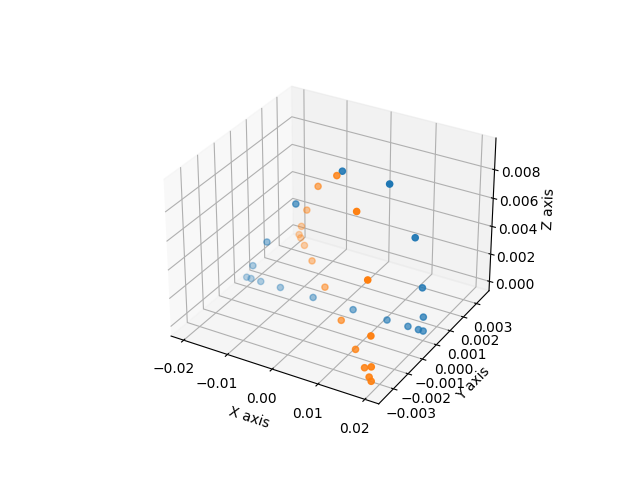

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2])
ax.scatter(trajectory1[:, 0], trajectory1[:, 1], trajectory1[:, 2])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

Text(0.5, 0, 'Z axis')

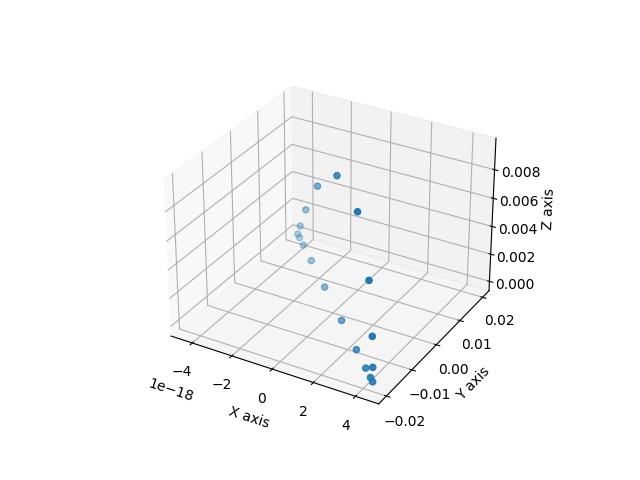

In [7]:
traj = gc._trajectory(np.radians(90), 100, False)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(traj[:, 0], traj[:, 1], traj[:, 2])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

In [8]:
traj = gc._trajectory(np.radians(90), 100, False)
for leg in range(len(gc.legs)):
    for j in range(len(gc.joints)):
        fn = "%s_%s" % (gc.legs[leg], gc.joints[j])
        with open("../controller/servos/leg-test3d/%s" % fn, "w") as f:
            for tick in range(len(traj)):
                fp = gc.mpInverseKin(gc.legs[leg], gc.neutral_foot_position[leg] + traj[tick])
                if 'hip' in fn:
                    f.write("%.10f\n" % fp[j])
                if 'upper' in fn:
                    f.write("%.10f\n" % (float(fp[j])-np.pi))
                if 'lower' in fn:
                    f.write("%.10f\n" % -fp[j])

# Parameters

The parameters that we want to expose to steer the robot are forward (x direction) and sideward (y direction) velocity and we call them vel_x and vel_y

## Velocity

vel_x and vel_y are in a range of [-100, 100] and should be considered as percentage of maximum speed. We calculate the speed as the maximum of the absolute values of vel_x and vel_y

## Direction

The direction is the direction of the vector [vel_x, vel_y] To turn the body of the robot we will move the front legs in the indicated direction but keep the hind legs in the x direction.

## Number of points in trajectory

A foot trajectory is the combination of the stance phase and the swing phase, each of these phases is approximated by a number of points. The total number of points in all phases are the number of points in the trajectory. 

## Frequency

We process each point of the trajectory in a loop. The frequency determines how many points we process per second. If we increase the number of points by keeping the frequency we slow down the movement. If we decrease the frequency and keep the same number of points we also slow down the movement.

## Step length

Length of a step

## Step height

Height of a step. 

In [9]:
# Direction
for vel_x in [-100, -50, 0, 50, 100]:
    for vel_y in [-100, -50, 0, 50, 100]:
        alpha = np.arctan2(vel_y, vel_x)
        print("vel_x: %s vel_y: %s alpha: %s" %(vel_x, vel_y, np.degrees(alpha)))

vel_x: -100 vel_y: -100 alpha: -135.0
vel_x: -100 vel_y: -50 alpha: -153.434948822922
vel_x: -100 vel_y: 0 alpha: 180.0
vel_x: -100 vel_y: 50 alpha: 153.434948822922
vel_x: -100 vel_y: 100 alpha: 135.0
vel_x: -50 vel_y: -100 alpha: -116.56505117707799
vel_x: -50 vel_y: -50 alpha: -135.0
vel_x: -50 vel_y: 0 alpha: 180.0
vel_x: -50 vel_y: 50 alpha: 135.0
vel_x: -50 vel_y: 100 alpha: 116.56505117707799
vel_x: 0 vel_y: -100 alpha: -90.0
vel_x: 0 vel_y: -50 alpha: -90.0
vel_x: 0 vel_y: 0 alpha: 0.0
vel_x: 0 vel_y: 50 alpha: 90.0
vel_x: 0 vel_y: 100 alpha: 90.0
vel_x: 50 vel_y: -100 alpha: -63.43494882292201
vel_x: 50 vel_y: -50 alpha: -45.0
vel_x: 50 vel_y: 0 alpha: 0.0
vel_x: 50 vel_y: 50 alpha: 45.0
vel_x: 50 vel_y: 100 alpha: 63.43494882292201
vel_x: 100 vel_y: -100 alpha: -45.0
vel_x: 100 vel_y: -50 alpha: -26.56505117707799
vel_x: 100 vel_y: 0 alpha: 0.0
vel_x: 100 vel_y: 50 alpha: 26.56505117707799
vel_x: 100 vel_y: 100 alpha: 45.0


In [10]:
# Speed
for vel_x in [-100, -50, 0, 50, 100]:
    for vel_y in [-100, -50, 0, 50, 100]:
        speed = max(abs(vel_y), abs(vel_x))
        print("vel_x: %s vel_y: %s speed: %s" %(vel_x, vel_y, speed))

vel_x: -100 vel_y: -100 speed: 100
vel_x: -100 vel_y: -50 speed: 100
vel_x: -100 vel_y: 0 speed: 100
vel_x: -100 vel_y: 50 speed: 100
vel_x: -100 vel_y: 100 speed: 100
vel_x: -50 vel_y: -100 speed: 100
vel_x: -50 vel_y: -50 speed: 50
vel_x: -50 vel_y: 0 speed: 50
vel_x: -50 vel_y: 50 speed: 50
vel_x: -50 vel_y: 100 speed: 100
vel_x: 0 vel_y: -100 speed: 100
vel_x: 0 vel_y: -50 speed: 50
vel_x: 0 vel_y: 0 speed: 0
vel_x: 0 vel_y: 50 speed: 50
vel_x: 0 vel_y: 100 speed: 100
vel_x: 50 vel_y: -100 speed: 100
vel_x: 50 vel_y: -50 speed: 50
vel_x: 50 vel_y: 0 speed: 50
vel_x: 50 vel_y: 50 speed: 50
vel_x: 50 vel_y: 100 speed: 100
vel_x: 100 vel_y: -100 speed: 100
vel_x: 100 vel_y: -50 speed: 100
vel_x: 100 vel_y: 0 speed: 100
vel_x: 100 vel_y: 50 speed: 100
vel_x: 100 vel_y: 100 speed: 100


In [11]:
# Align number of points with speed
number_of_points = 10
speed = 55
number_of_points + int((100 - speed)/2)

32

## Gait Scheduling

The sequence how we move each leg determines the gait. There are different gaits and even different names for these gaits. We study walk, trot and gallop.

In [12]:
number_of_points = 10
stance_n_o_p = number_of_points
swing_n_o_p = number_of_points - 2    

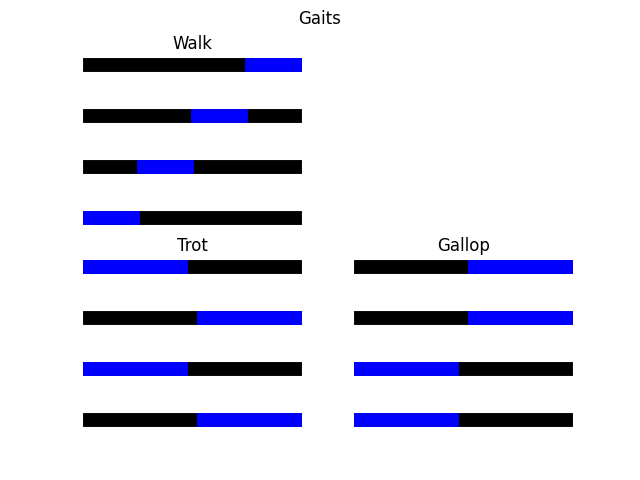

In [13]:
fig, axs = plt.subplots(ncols=2, nrows=2)
for i in range(4):
    axs[0,0].plot([0, 3*stance_n_o_p + swing_n_o_p], [i+1, i+1], 'k', linewidth=10)
    start = i * stance_n_o_p
    axs[0,0].plot([start, start + swing_n_o_p], [i+1, i+1], 'b', linewidth=10)
for i in range(4):
    axs[1,0].plot([0, stance_n_o_p + swing_n_o_p], [i+1, i+1], 'k', linewidth=10)
    if i % 2:
        start = 0
    else: 
        start = stance_n_o_p
    axs[1,0].plot([start, start + swing_n_o_p], [i+1, i+1], 'b', linewidth=10)
for i in range(4):
    axs[1,1].plot([0, stance_n_o_p + swing_n_o_p], [i+1, i+1], 'k', linewidth=10)
    if i < 2:
        start = 0
    else: 
        start = stance_n_o_p
    axs[1,1].plot([start, start + swing_n_o_p], [i+1, i+1], 'b', linewidth=10)
    
axs[0,1].plot([0], [0], 'k', linewidth=0)    
   
axs[0,0].axis('off')
axs[0,1].axis('off')
axs[1,0].axis('off')
axs[1,1].axis('off')

plt.suptitle('Gaits')
axs[0,0].set_title('Walk')
axs[1,0].set_title('Trot')
axs[1,1].set_title('Gallop')
plt.grid(visible=False, which='major')    

In [14]:
isWalking = True
speed = 100
swp = gc._swing_phase()
stp = gc._stance_phase(speed, isWalking)
traj_len = len(stp) + len(list(swp[0]))
trajectory = np.zeros((traj_len, 3))
trajectory[:, 0] = stp + list(swp[0])
trajectory[:, 2][len(stp):] = list(swp[1])

In [15]:
trajectory

array([[ 0.02      ,  0.        ,  0.        ],
       [ 0.01976851,  0.        ,  0.        ],
       [ 0.01946748,  0.        ,  0.        ],
       [ 0.01907758,  0.        ,  0.        ],
       [ 0.01857522,  0.        ,  0.        ],
       [ 0.01793232,  0.        ,  0.        ],
       [ 0.01711661,  0.        ,  0.        ],
       [ 0.0160929 ,  0.        ,  0.        ],
       [ 0.01482561,  0.        ,  0.        ],
       [ 0.0132831 ,  0.        ,  0.        ],
       [ 0.01144382,  0.        ,  0.        ],
       [ 0.00930368,  0.        ,  0.        ],
       [ 0.00688321,  0.        ,  0.        ],
       [ 0.00423212,  0.        ,  0.        ],
       [ 0.00142851,  0.        ,  0.        ],
       [-0.00142851,  0.        ,  0.        ],
       [-0.00423212,  0.        ,  0.        ],
       [-0.00688321,  0.        ,  0.        ],
       [-0.00930368,  0.        ,  0.        ],
       [-0.01144382,  0.        ,  0.        ],
       [-0.0132831 ,  0.        ,  0.   

In [16]:
np.roll(trajectory, 2*len(list(swp[0])), axis=0)

array([[-0.0160929 ,  0.        ,  0.        ],
       [-0.01711661,  0.        ,  0.        ],
       [-0.01793232,  0.        ,  0.        ],
       [-0.01857522,  0.        ,  0.        ],
       [-0.01907758,  0.        ,  0.        ],
       [-0.01946748,  0.        ,  0.        ],
       [-0.01976851,  0.        ,  0.        ],
       [-0.02      ,  0.        ,  0.        ],
       [-0.01846521,  0.        ,  0.00099723],
       [-0.01504552,  0.        ,  0.00303655],
       [-0.00829051,  0.        ,  0.00634544],
       [ 0.00204055,  0.        ,  0.00948565],
       [ 0.01218792,  0.        ,  0.00948565],
       [ 0.01780867,  0.        ,  0.00634544],
       [ 0.01960035,  0.        ,  0.00303655],
       [ 0.01996106,  0.        ,  0.00099723],
       [ 0.02      ,  0.        ,  0.        ],
       [ 0.01976851,  0.        ,  0.        ],
       [ 0.01946748,  0.        ,  0.        ],
       [ 0.01907758,  0.        ,  0.        ],
       [ 0.01857522,  0.        ,  0.   

In [17]:
angle = 0
gait_plan = gc._gait_plan(angle, 'trot', speed)

In [18]:
gait_plan

[array([[ 0.00000000e+00,  4.72692333e-01, -1.46888687e+00],
        [ 0.00000000e+00,  4.89908254e-01, -1.47760213e+00],
        [ 0.00000000e+00,  5.27975809e-01, -1.49569849e+00],
        [ 0.00000000e+00,  6.02710883e-01, -1.52635772e+00],
        [ 0.00000000e+00,  7.19487562e-01, -1.56024931e+00],
        [ 0.00000000e+00,  8.47633960e-01, -1.57399526e+00],
        [ 0.00000000e+00,  9.41936384e-01, -1.56301227e+00],
        [ 0.00000000e+00,  9.92911100e-01, -1.54634332e+00],
        [ 0.00000000e+00,  1.01629038e+00, -1.53523721e+00],
        [ 0.00000000e+00,  1.02631047e+00, -1.52966073e+00],
        [ 0.00000000e+00,  1.02837863e+00, -1.56440623e+00],
        [-5.55111512e-17,  1.02568103e+00, -1.63284977e+00],
        [-1.11022302e-16,  9.92795726e-01, -1.73448601e+00],
        [-1.66533454e-16,  8.79543832e-01, -1.80700560e+00],
        [-1.66533454e-16,  7.05247135e-01, -1.76487319e+00],
        [-1.11022302e-16,  5.75177742e-01, -1.64993230e+00],
        [-5.55111512e-17